In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans,SpectralClustering, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer
import seaborn as sns

In [2]:
df = pd.read_csv('Dataset_spine.csv')
df.columns = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','Sacrum_angle','Scoliosis_slope','Class','Unnamed']

In [3]:
del df['Unnamed']
df

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,Sacrum_angle,Scoliosis_slope,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal


In [4]:
df.describe()

,pelvic_incidence,pelvic tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,Direct_tilt,thoracic_slope,cervical_tilt,Sacrum_angle,Scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [5]:
df.isnull().sum()

pelvic_incidence            0
pelvic tilt                 0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
pelvic_slope                0
Direct_tilt                 0
thoracic_slope              0
cervical_tilt               0
Sacrum_angle                0
Scoliosis_slope             0
Class                       0
dtype: int64

<AxesSubplot:>

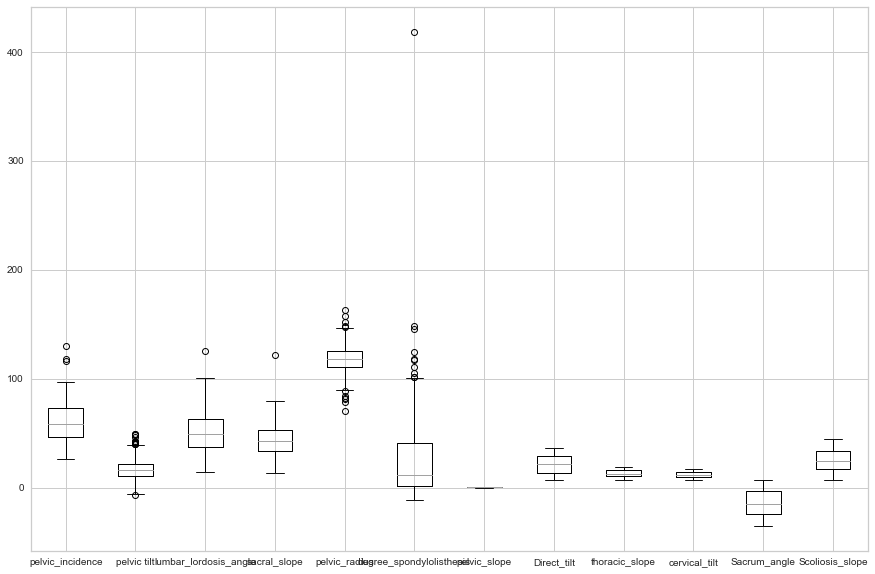

In [6]:
df.boxplot(figsize=(15,10))

C:\Users\Sazgar\AppData\Local\Temp/ipykernel_3956/619343124.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  z = (df-df.median())/df.std()


,Class,Direct_tilt,Sacrum_angle,Scoliosis_slope,cervical_tilt,degree_spondylolisthesis,lumbar_lordosis_angle,pelvic tilt,pelvic_incidence,pelvic_radius,pelvic_slope,sacral_slope,thoracic_slope,Classes
0,NaN,-1.081212,-1.148055,1.777929,1.158153,-0.320092,-0.536448,0.618974,0.251604,-1.471405,0.939564,-0.143758,0.470672,Abnormal
1,NaN,-1.044022,-0.892207,-0.844142,1.669748,-0.191796,-1.323000,-0.629146,-1.139098,-0.290054,-0.212756,-0.998946,1.351246,Abnormal
2,NaN,0.570310,-1.178597,-0.546368,1.626237,-0.407312,0.028554,0.585592,0.588343,-0.922332,-0.003847,0.313536,1.337657,Abnormal
3,NaN,0.191350,-1.296248,-0.583610,-0.182965,-0.014814,-0.283019,0.828828,0.615320,-1.231450,-0.373157,0.166818,-0.067962,Abnormal
4,NaN,1.572657,-0.143594,-0.001421,-1.065048,-0.102490,-1.145032,-0.670003,-0.520881,-0.758367,0.235742,-0.174634,0.887178,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,NaN,-1.627869,-0.090472,-1.280769,-1.187850,-0.426351,-0.730966,-0.273872,-0.625850,-0.061507,-1.211549,-0.604781,0.532383,Normal
306,NaN,-0.313511,1.687993,1.812090,-1.681970,-0.324528,-1.096356,0.436018,-0.275827,-0.293026,-1.497883,-0.684615,1.546822,Normal
307,NaN,-0.659911,1.487644,-0.623589,-1.056977,-0.385415,-0.182820,0.633200,0.159867,0.555856,-1.381863,-0.272164,0.181795,Normal
308,NaN,-0.830351,1.667828,0.840840,-0.758525,-0.307601,-0.430055,-0.765815,-0.779638,0.020850,-1.108302,-0.435464,0.927828,Normal


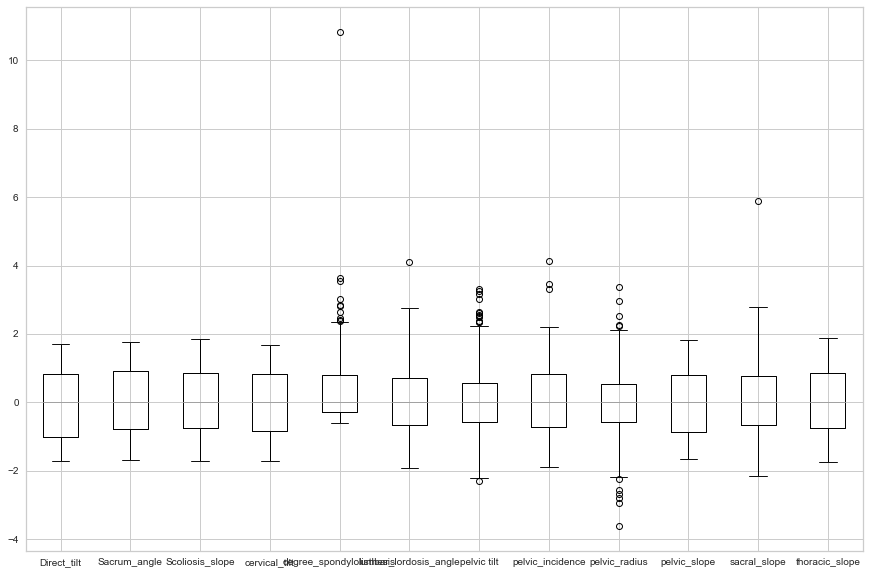

In [7]:
z = (df-df.median())/df.std()
z.boxplot(figsize=(15,10))
z = z.fillna(z.median())
z['Classes'] = df.Class
z

In [8]:
del z["Class"]
z

,Direct_tilt,Sacrum_angle,Scoliosis_slope,cervical_tilt,degree_spondylolisthesis,lumbar_lordosis_angle,pelvic tilt,pelvic_incidence,pelvic_radius,pelvic_slope,sacral_slope,thoracic_slope,Classes
0,-1.081212,-1.148055,1.777929,1.158153,-0.320092,-0.536448,0.618974,0.251604,-1.471405,0.939564,-0.143758,0.470672,Abnormal
1,-1.044022,-0.892207,-0.844142,1.669748,-0.191796,-1.323000,-0.629146,-1.139098,-0.290054,-0.212756,-0.998946,1.351246,Abnormal
2,0.570310,-1.178597,-0.546368,1.626237,-0.407312,0.028554,0.585592,0.588343,-0.922332,-0.003847,0.313536,1.337657,Abnormal
3,0.191350,-1.296248,-0.583610,-0.182965,-0.014814,-0.283019,0.828828,0.615320,-1.231450,-0.373157,0.166818,-0.067962,Abnormal
4,1.572657,-0.143594,-0.001421,-1.065048,-0.102490,-1.145032,-0.670003,-0.520881,-0.758367,0.235742,-0.174634,0.887178,Abnormal
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305,-1.627869,-0.090472,-1.280769,-1.187850,-0.426351,-0.730966,-0.273872,-0.625850,-0.061507,-1.211549,-0.604781,0.532383,Normal
306,-0.313511,1.687993,1.812090,-1.681970,-0.324528,-1.096356,0.436018,-0.275827,-0.293026,-1.497883,-0.684615,1.546822,Normal
307,-0.659911,1.487644,-0.623589,-1.056977,-0.385415,-0.182820,0.633200,0.159867,0.555856,-1.381863,-0.272164,0.181795,Normal
308,-0.830351,1.667828,0.840840,-0.758525,-0.307601,-0.430055,-0.765815,-0.779638,0.020850,-1.108302,-0.435464,0.927828,Normal


## Correlation

Text(0.5, 1.0, 'Cororlation Heat map')

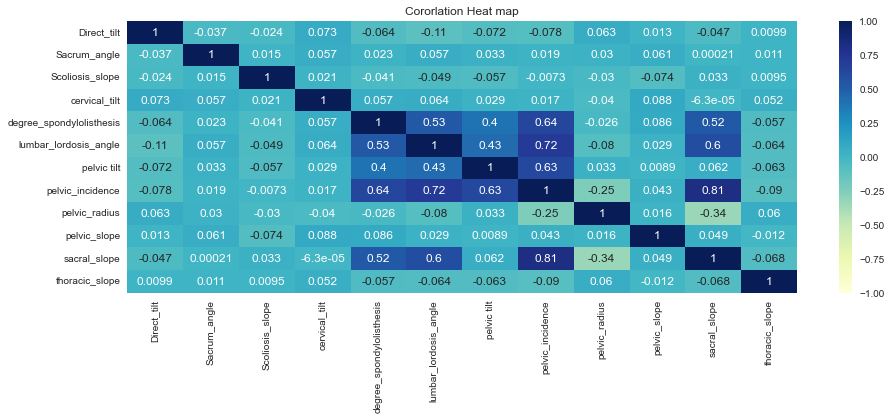

In [9]:
import seaborn as sns
better_heatmat = plt.figure(figsize=(15,5))
sns.heatmap(z.corr(), vmin= -1 , vmax =1 , annot = True, cmap= "YlGnBu").set_title("Cororlation Heat map")

## Creating our models

In [10]:
models = {
    
    "SGD" : SGDClassifier(),
    'SGD_log' : SGDClassifier(loss='log'),
    'SGD_squared_hinge' : SGDClassifier(loss='squared_hinge',alpha=0.015),
    'SVC' : SVC(max_iter=-1),
    'RandomForest': RandomForestClassifier(),
    "decision_tree" : DecisionTreeClassifier()
}


feature_cols = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','Sacrum_angle','Scoliosis_slope']
x = z[feature_cols]
y = z['Classes']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=1)


In [11]:
def test_models (model):
    model.fit(X_train,Y_train)
    pred = model.predict(X_test) 
#     print(classification_report(Y_test,pred))
    cnf_matrix = metrics.confusion_matrix(Y_test,pred)
    heat_map = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    plt.show(heat_map)
    return metrics.accuracy_score(Y_test,pred)

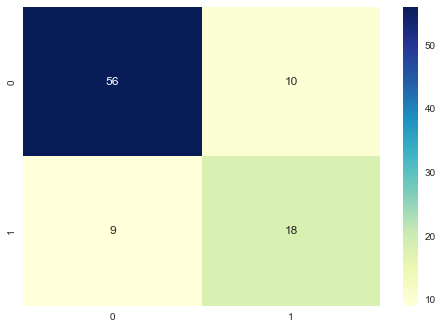

SGD: 0.796
------------------


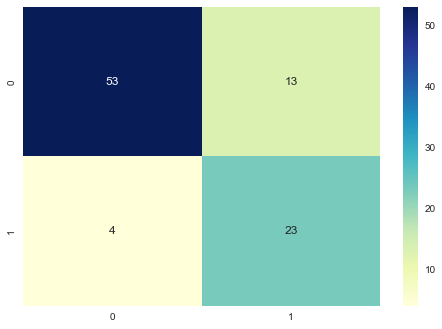

SGD_log: 0.817
------------------


c:\users\sazgar\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:574: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


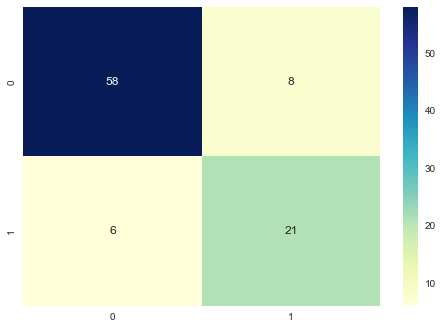

SGD_squared_hinge: 0.849
------------------


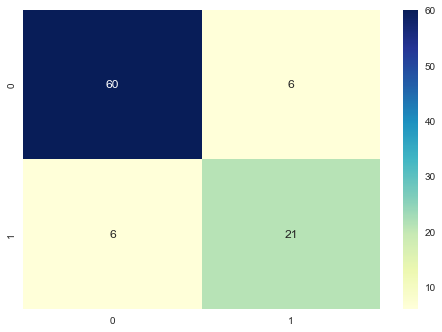

kernel Type: linear
SVC: 0.871
------------------


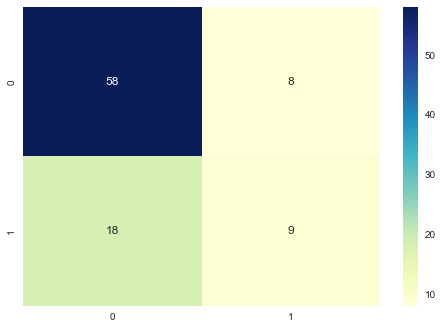

kernel Type: poly
SVC: 0.720
------------------


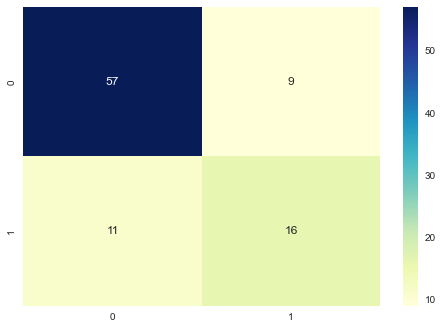

kernel Type: rbf
SVC: 0.785
------------------


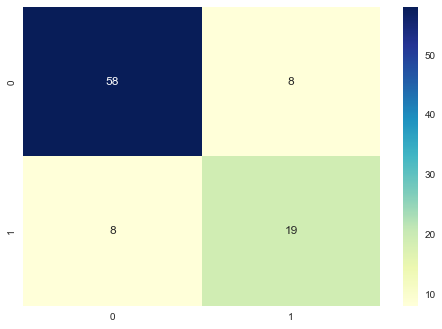

kernel Type: sigmoid
SVC: 0.828
------------------


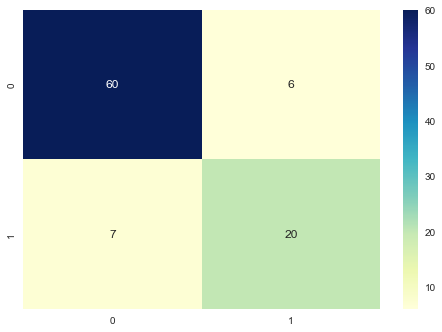

RandomForest: 0.860
------------------


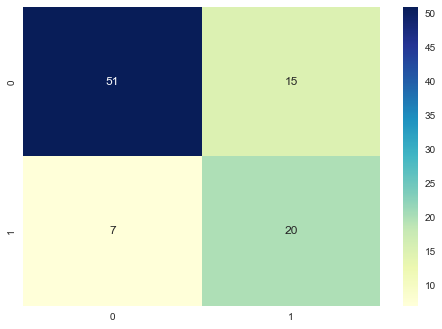

decision_tree: 0.763
------------------


In [12]:
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
for model_name,i in models.items():
    if model_name == 'SVC':
        print("=======================")
        for j in kernel:
            accuracy= test_models(SVC(kernel=j,max_iter=-1))
            print("kernel Type: "+j)
            print(f'{model_name}: {accuracy:.3f}\n------------------')
        print("=======================")

    else:
        accuracy= test_models(i)
        print(f'{model_name}: {accuracy:.3f}\n------------------')

- as it is visible, we could reached to accuracy of 87.1% by the SCV algorithm on Linear kernel

## KNN

In [39]:
z['Classes'] = df.Class

              precision    recall  f1-score   support

    Abnormal       0.81      0.86      0.84        66
      Normal       0.61      0.52      0.56        27

    accuracy                           0.76        93
   macro avg       0.71      0.69      0.70        93
weighted avg       0.75      0.76      0.76        93

[[57  9]
 [13 14]]


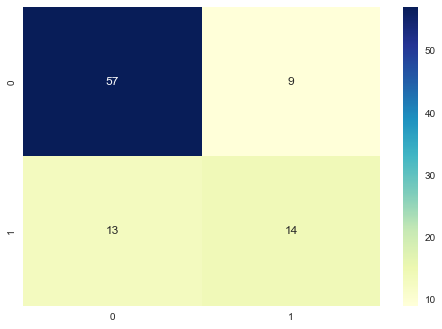

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

feature_cols = ['pelvic_incidence','pelvic tilt','lumbar_lordosis_angle','sacral_slope','pelvic_radius','degree_spondylolisthesis','pelvic_slope','Direct_tilt','thoracic_slope','cervical_tilt','Sacrum_angle','Scoliosis_slope']


y = z['Classes']
X_train, X_test, Y_train, Y_test = train_test_split(x,y,test_size=0.3,random_state=1)


scaler = StandardScaler()
scaler.fit(X_test)

classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train,Y_train)

Y_predict = classifier.predict(X_test)


print(classification_report(Y_test,Y_predict))
print(confusion_matrix(Y_test,Y_predict))
cnf_matrix_3 = metrics.confusion_matrix(Y_test, Y_predict) 
heat_map = sns.heatmap(pd.DataFrame(cnf_matrix_3), annot=True, cmap="YlGnBu" ,fmt='g')
plt.show(heat_map)

# Clustring

In [42]:
del z["Classes"]

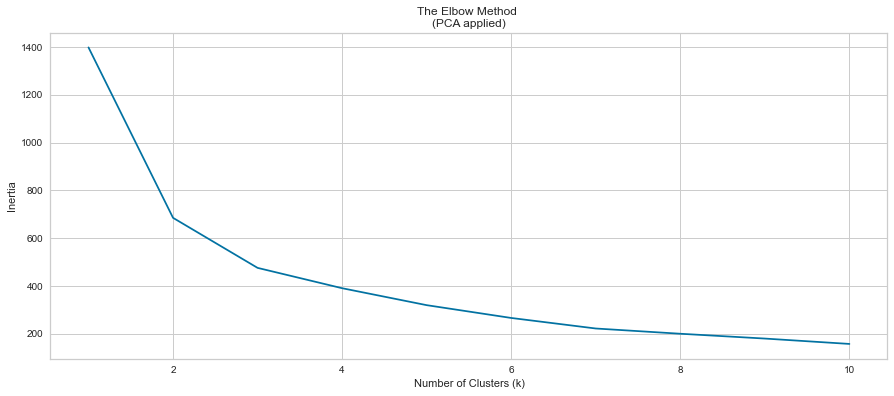

In [43]:
pca = PCA(n_components=2)
pca = pca.fit_transform(z)
pca = pd.DataFrame(pca)
pca.columns =['X','Y']

inertia = []
K = range(1,11)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(pca)
    inertia.append(kmeanModel.inertia_)
plt.figure(figsize=(15,6))
plt.plot(K, inertia, 'bx-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('The Elbow Method \n(PCA applied)')
plt.show()

## K-Mean

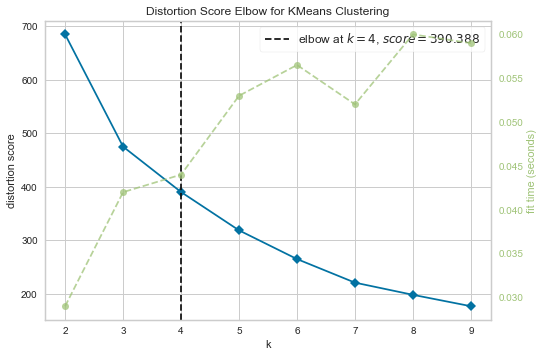

In [46]:
from yellowbrick.cluster import KElbowVisualizer

def K_number(model,data,silhouette_visualizer = True):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(2,10), timings= True)
    visualizer.fit(data)       
    visualizer.show() 

kmeans = KMeans()    
K_number(kmeans,pca)

In [47]:
def evaluate(model,data,silhouette_visualizer = False):
    if silhouette_visualizer:
        visualizer = SilhouetteVisualizer(model,k=(2,40),timings=True)
        visualizer.fit(data)
        visualizer.show()   
    y = model.fit_predict(data)
    
    print("Silhouette Score"+" : "+str("{:.2f}".format(silhouette_score(data, y))))
    print("Davies Bouldin Score"+" : "+str("{:.2f}".format(davies_bouldin_score(data, y))))

In [48]:

for i in range(2,11):
  kmeans = KMeans(n_clusters=i, random_state=42)
  print("Number of Clusters : " + str(i))
  evaluate(kmeans, pca)
  print("====================")

Number of Clusters : 2
Silhouette Score : 0.47
Davies Bouldin Score : 0.85
Number of Clusters : 3
Silhouette Score : 0.40
Davies Bouldin Score : 0.90
Number of Clusters : 4
Silhouette Score : 0.38
Davies Bouldin Score : 0.88
Number of Clusters : 5
Silhouette Score : 0.35
Davies Bouldin Score : 0.93
Number of Clusters : 6
Silhouette Score : 0.35
Davies Bouldin Score : 0.90
Number of Clusters : 7
Silhouette Score : 0.36
Davies Bouldin Score : 0.85
Number of Clusters : 8
Silhouette Score : 0.34
Davies Bouldin Score : 0.86
Number of Clusters : 9
Silhouette Score : 0.34
Davies Bouldin Score : 0.79
Number of Clusters : 10
Silhouette Score : 0.33
Davies Bouldin Score : 0.83


## Gaussian Mixture

In [67]:
for i in range(2,11):
  gmm = GaussianMixture(n_components=i, random_state=42,covariance_type='full')
  print("Number of Components : " + str(i))
  evaluate(gmm, pca)
  print("====================")

Number of Components : 2
Silhouette Score : 0.45
Davies Bouldin Score : 0.88
Number of Components : 3
Silhouette Score : 0.40
Davies Bouldin Score : 0.92
Number of Components : 4
Silhouette Score : 0.36
Davies Bouldin Score : 1.09
Number of Components : 5
Silhouette Score : 0.33
Davies Bouldin Score : 1.00
Number of Components : 6
Silhouette Score : 0.32
Davies Bouldin Score : 0.95
Number of Components : 7
Silhouette Score : 0.35
Davies Bouldin Score : 0.87
Number of Components : 8
Silhouette Score : 0.33
Davies Bouldin Score : 0.86
Number of Components : 9
Silhouette Score : 0.30
Davies Bouldin Score : 0.97
Number of Components : 10
Silhouette Score : 0.30
Davies Bouldin Score : 0.92


## Visualization

In [68]:

def plot_model_clustering(model, data):
  plt.figure(figsize=(15,7))
  model.fit(data)
  labels= model.labels_
  df_label=data.copy()
  df_label['labels']= labels
  ax = sns.scatterplot(x='X', y='Y', hue='labels', data=df_label, palette='bright')
  for index in range(len(str(model))):
    if str(model)[index] == '(':
      ind = index
  ax.set_title(str(model)[:ind])

  evaluate(model, data)

Silhouette Score : 0.29
Davies Bouldin Score : 1.05


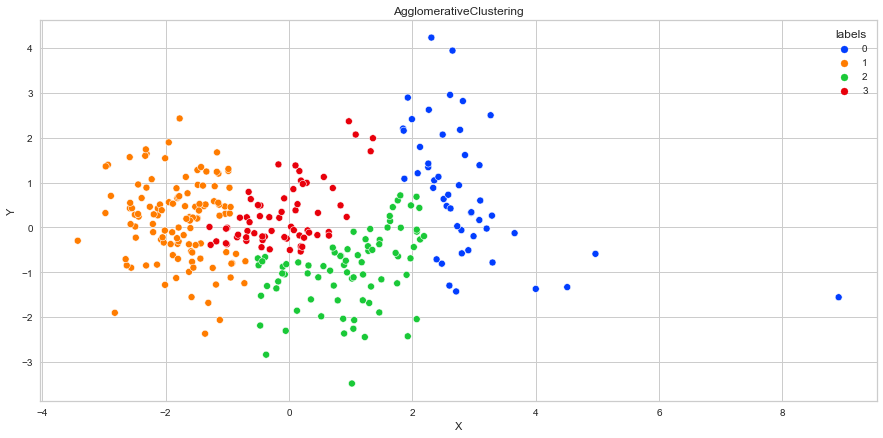

In [71]:
hcluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage="ward")
plot_model_clustering(hcluster, pca)

Silhouette Score : 0.33
Davies Bouldin Score : 0.83


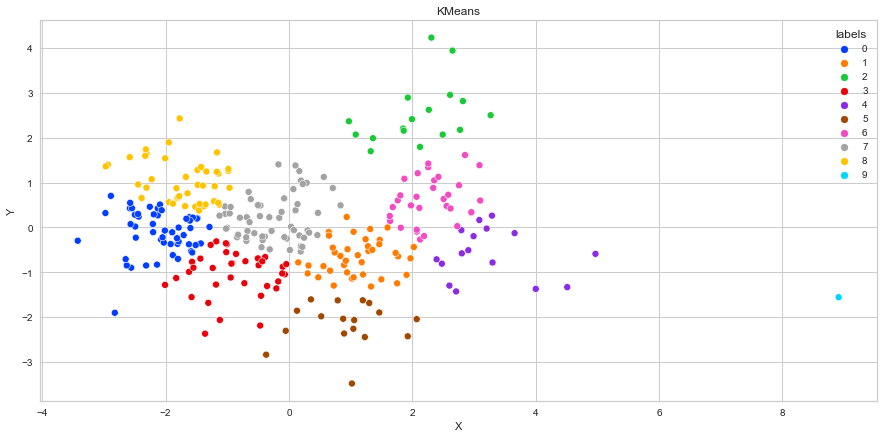

In [70]:
plot_model_clustering(kmeans, pca)